In [1]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for building the model and evaluation it
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# set a style for out plots
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('advertising.csv')
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


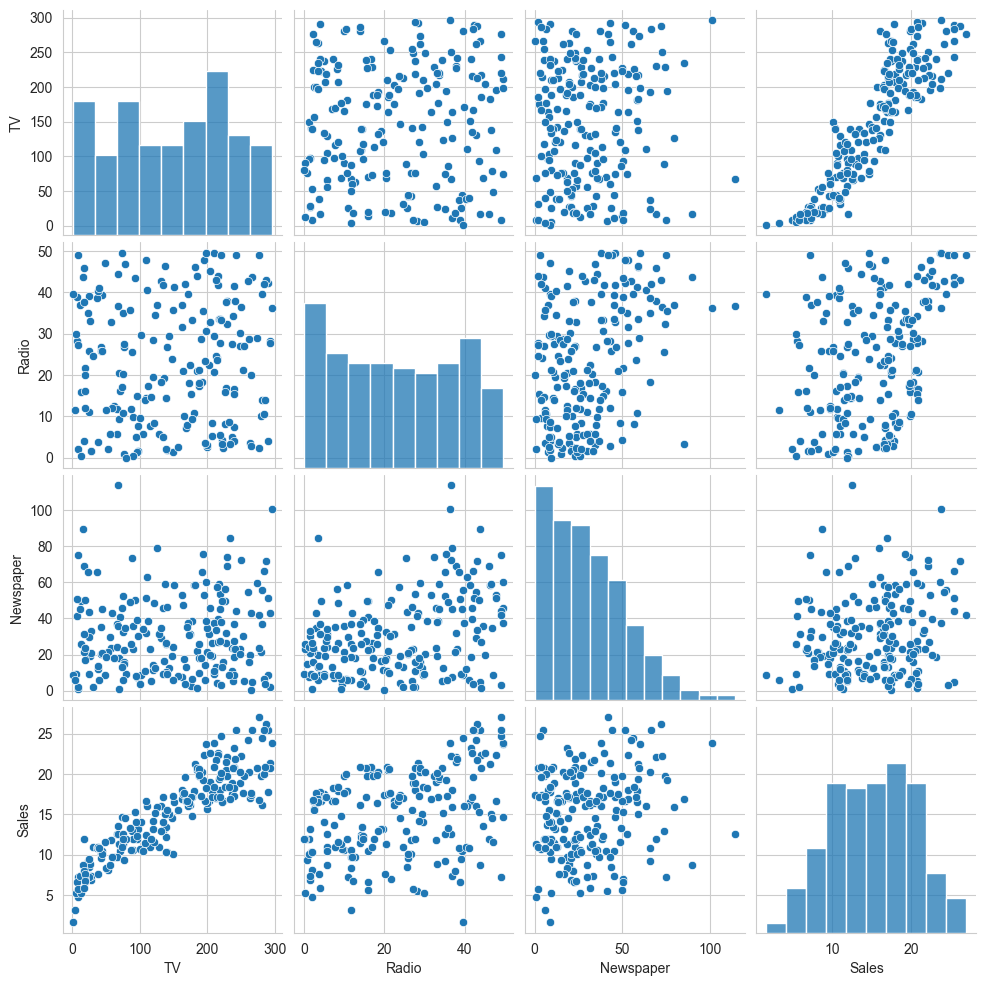

In [3]:
sns.pairplot(df)
plt.show()

In [4]:
X = df[['TV']]
y = df['Sales']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train): ", X_train.shape)
print("Testing set shape (X_test): ", X_test.shape)

Training set shape (X_train):  (160, 1)
Testing set shape (X_test):  (40, 1)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"model intercept : {model.intercept_:.4f}")
print(f"model slope : {model.coef_[0]:.4f}")

model intercept : 7.0071
model slope : 0.0555


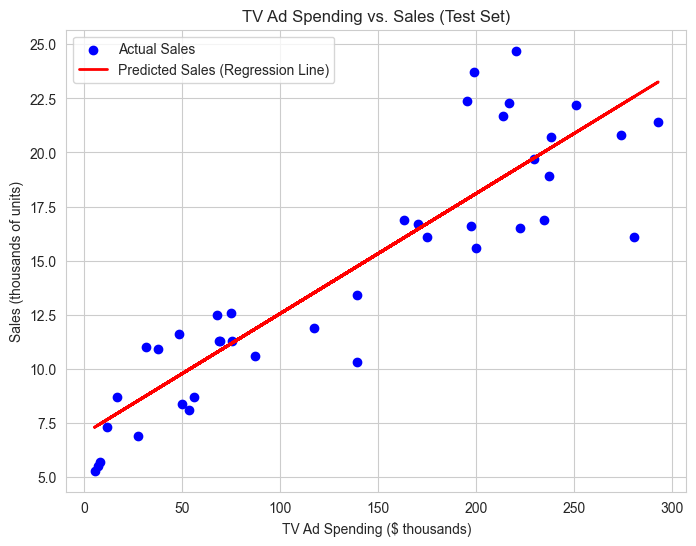

In [7]:
# Plot the regression line on the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Predicted Sales (Regression Line)')
plt.title('TV Ad Spending vs. Sales (Test Set)')
plt.xlabel('TV Ad Spending ($ thousands)')
plt.ylabel('Sales (thousands of units)')
plt.legend()
plt.show()

In [8]:
# The value you want to predict for
tv_spending = 220 

# Put the value into a 2D list-like structure
# The outer brackets represent the list of observations (we have 1)
# The inner brackets represent the list of features for that observation (just TV)
new_data_simple = [[tv_spending]]

# Use the trained simple model to predict
predicted_sales_simple = model.predict(new_data_simple)

print(f"Predicted sales for ${tv_spending}k in TV ads: {predicted_sales_simple[0]:.2f} thousand units.")

Predicted sales for $220k in TV ads: 19.21 thousand units.


C:\Users\Sachindu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# Make prediction on the test data
y_pred_simple = model.predict(X_test)

# Calculator and print the evaluation metrics
mse_value = metrics.mean_squared_error(y_test,y_pred_simple)
print(f"Mean squared Error (MSE): {mse_value:.4f}")
print(type(mse_value))
rmse_value = np.square(mse_value)
print(f"Root Mean Squared Error (RMSE): {rmse_value:.4f}")

Mean squared Error (MSE): 6.1011
<class 'float'>
Root Mean Squared Error (RMSE): 37.2231
